In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [2]:
accidents_df = pd.read_csv('US_Accidents_Dec20_updated 2.csv')
accidents_df['Start_Date'] = pd.to_datetime(accidents_df['Start_Time'])
accidents_df['End_Date'] = pd.to_datetime(accidents_df['End_Time'])
accidents_df['Month'] = accidents_df['Start_Date'].dt.month
accidents_df['Year'] = accidents_df['Start_Date'].dt.year
accidents_df['Month_year'] = pd.to_datetime(accidents_df[['Year', 'Month']].assign(Day=1))

accidents_df['diff_minutes'] = accidents_df['End_Date'] - accidents_df['Start_Date']
accidents_df['diff_minutes']=accidents_df['diff_minutes']/np.timedelta64(1,'m')


In [3]:
accidents_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Start_Date', 'End_Date', 'Month', 'Year',
       'Month_year', 'diff_minutes'],
      dtype='object')

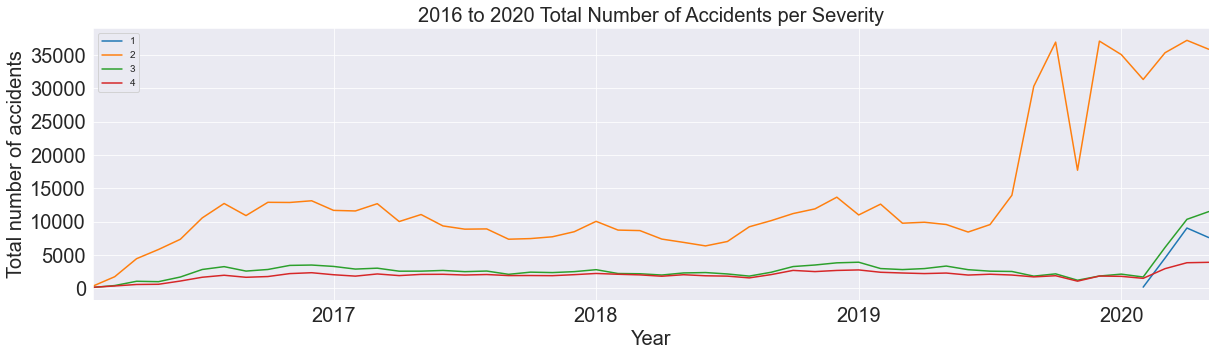

In [4]:
filter_year = accidents_df[ (accidents_df.Month_year >= '2016-02-01') & (accidents_df.Month_year <= '2020-05-01')]
count_yr = filter_year.groupby(['Month_year','Severity']).agg(count = ("ID","count"),
                                             dist_avg = ("Distance(mi)","mean"))
avg_dist_reset = count_yr.reset_index()
avg_dist_index = avg_dist_reset.set_index('Month_year')
fig, ax = plt.subplots()
avg_dist_index.groupby('Severity')['count'].plot(ax = ax, ylabel = 'Total number of accidents', xlabel = 'Year',title = "2016 to 2020 Total Number of Accidents per Severity",legend=True)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

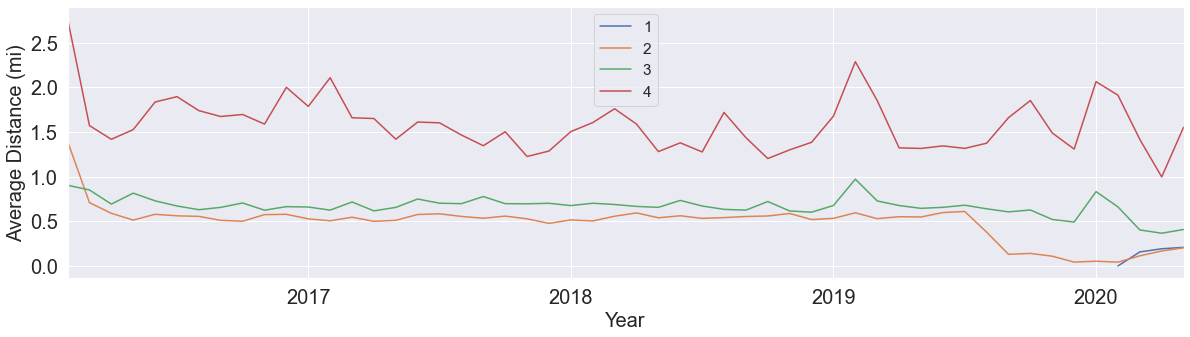

In [54]:
fig, ax = plt.subplots()
avg_dist_index.groupby('Severity')['dist_avg'].plot(ylabel = 'Average Distance (mi)',xlabel = 'Year', legend=True)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

/var/folders/9y/bwn856cd0_z4h_gyjb1b6hl80000gn/T/ipykernel_21972/3715393003.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  d_outliers = dist_new_df [ ((dist_new_df < dlower_limit) | ((dist_new_df > dupper_limit))).any(axis=1) ]
/var/folders/9y/bwn856cd0_z4h_gyjb1b6hl80000gn/T/ipykernel_21972/3715393003.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  d_no_outliers = dist_new_df [~((dist_new_df < dlower_limit) | ((dist_new_df > dupper_limit))).any(axis=1) ]


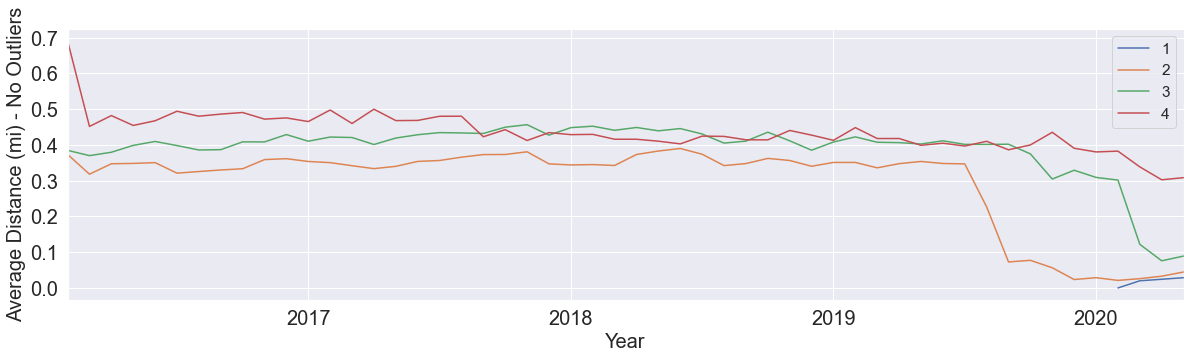

In [55]:
new_df = filter_year[['ID','Month_year','Severity']]
new_merge_df = new_df.set_index('ID')
dist_new_df = filter_year[['Distance(mi)','ID']]
new_dist_df = dist_new_df.set_index('ID')

dq1 = dist_new_df.quantile(.25)
dq3 = dist_new_df.quantile(.75)
iqr = dq3-dq1
dlower_limit = dq1 - 1.5*iqr
dupper_limit = dq3 + 1.5*iqr

d_outliers = dist_new_df [ ((dist_new_df < dlower_limit) | ((dist_new_df > dupper_limit))).any(axis=1) ]
d_no_outliers = dist_new_df [~((dist_new_df < dlower_limit) | ((dist_new_df > dupper_limit))).any(axis=1) ]
no_out_dist = d_no_outliers.merge(new_merge_df, on = 'ID', how = 'left')
noout_dist = no_out_dist.groupby(['Month_year','Severity']).agg(count = ("ID","count"),
                                             Dist_avg = ("Distance(mi)","mean"))
noout_reset = noout_dist.reset_index()
dist_no_out = noout_reset.set_index('Month_year')
fig, ax = plt.subplots()
dist_no_out.groupby('Severity')['Dist_avg'].plot(ylabel = 'Average Distance (mi) - No Outliers',xlabel = 'Year', legend=True)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

# A closer look into the # of accidents over the years per severity

## February 2016 to May 2020

# Does weather conditions have an impact on severity of an accident?

/var/folders/9y/bwn856cd0_z4h_gyjb1b6hl80000gn/T/ipykernel_21972/2102312673.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  w.set_yticklabels(w.get_yticks(), size = 15)


[Text(0, 0.0, '0.0'),
 Text(0, 25000.0, '25000.0'),
 Text(0, 50000.0, '50000.0'),
 Text(0, 75000.0, '75000.0'),
 Text(0, 100000.0, '100000.0'),
 Text(0, 125000.0, '125000.0'),
 Text(0, 150000.0, '150000.0'),
 Text(0, 175000.0, '175000.0'),
 Text(0, 200000.0, '200000.0')]

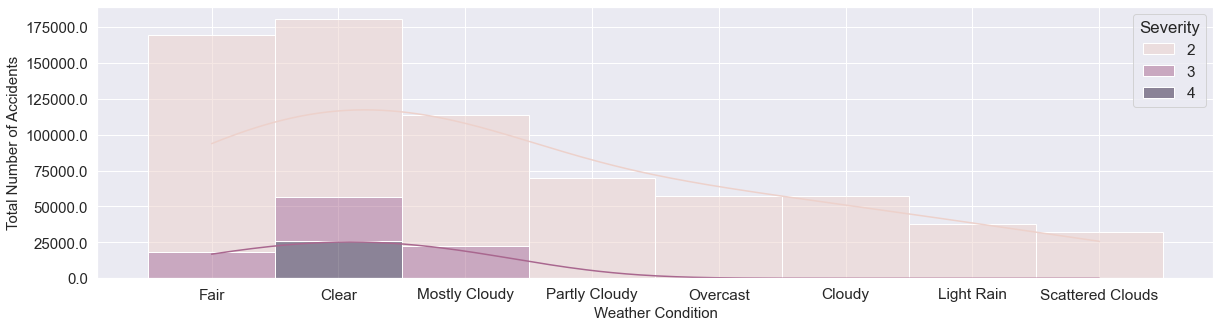

In [60]:
condition_sev = filter_year.groupby(['Weather_Condition', 'Severity']).agg(count = ("ID","count"))
cond_sev_total = condition_sev.reset_index()

w = sns.histplot(
    data=cond_sev_total.sort_values('count', ascending = False).head(12),
    x='Weather_Condition',
    weights='count',
    hue='Severity',
    multiple='stack',
    kde = True
)
w.set_xlabel("Weather Condition", fontsize = 15)
w.set_ylabel("Total Number of Accidents", fontsize = 15)
w.set_yticklabels(w.get_yticks(), size = 15)

Most accidents are level 2 severity as most accidents happen in Fair weather condition.
While most level 4 severity accidents happen on a clear day. 

Text(0, 0.5, 'Avg. Number of Accidents')

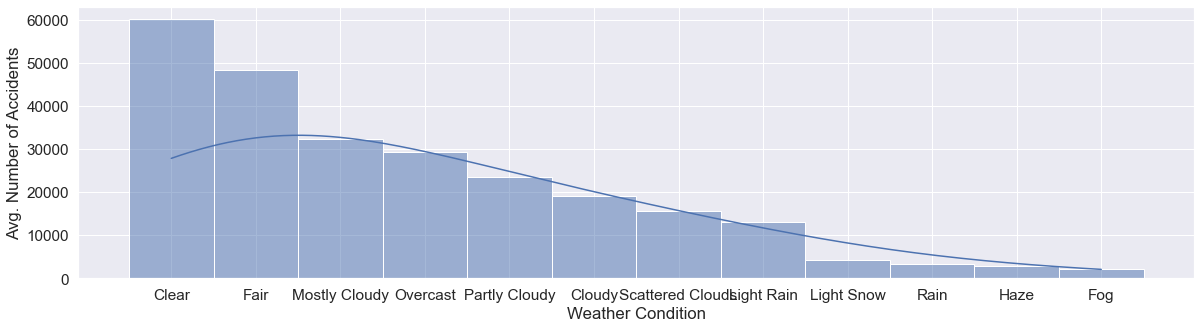

In [61]:
condition_sev = filter_year.groupby(['Weather_Condition', 'Severity']).agg(count = ("ID","count"))
cond_sev_total = condition_sev.reset_index()
avg_cond = cond_sev_total.groupby(['Weather_Condition']).agg(avg = ("count","mean")).reset_index()
avg_cond

r = sns.histplot(
    data=avg_cond.sort_values('avg', ascending = False).head(12),
    x='Weather_Condition',
    weights='avg',
    kde = True
)
r.set_xlabel("Weather Condition")
r.set_ylabel("Avg. Number of Accidents")

In [62]:
severity = filter_year.groupby(['Severity']).agg(Accidents = ("ID","count"),
                                                avg_dist = ("Distance(mi)","mean"),
                                                temp_avg = ("Temperature(F)","mean"),
                                                wind_temp_avg = ("Wind_Chill(F)","mean"),
                                                humidity_avg = ("Humidity(%)","mean"),
                                                pressure_avg =("Pressure(in)","mean"),
                                               visibility_avg = ("Visibility(mi)","mean"), 
                                                wind_mph_avg = ("Wind_Speed(mph)", "mean"),
                                                precipitation_avg = ("Precipitation(in)","mean"))
severity

,Accidents,avg_dist,temp_avg,wind_temp_avg,humidity_avg,pressure_avg,visibility_avg,wind_mph_avg,precipitation_avg
Severity,,,,,,,,,
1,21302,0.188947,67.575415,67.159660,51.253663,28.999570,9.444375,8.495490,0.005804
2,700096,0.359906,60.310010,53.540010,62.559301,29.613058,9.083659,8.009440,0.012685
3,146932,0.623803,60.337945,50.236520,64.850159,29.614419,9.315302,9.037254,0.019876
4,101421,1.548004,58.136498,47.337354,67.593638,29.751786,9.111194,8.485327,0.013195


In [63]:
new_year = filter_year[['Month_year','Severity', 'ID','Distance(mi)']]

weather_df = filter_year[['ID','Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)',
       'Wind_Speed(mph)']]
merge_df = filter_year[['ID','Severity','Month_year','Distance(mi)']]
merge_df.set_index('ID')

weather_df.set_index('ID')
q1 = weather_df.quantile(.25)
q3 = weather_df.quantile(.75)
iqr = q3-q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

outliers = weather_df [ ((weather_df < lower_limit) | ((weather_df > upper_limit))).any(axis=1) ]
no_outliers = weather_df [~((weather_df < lower_limit) | ((weather_df > upper_limit))).any(axis=1) ]
weather_severity = no_outliers.merge(merge_df, on = 'ID', how = 'left')
noout_weather = weather_severity.groupby(['Month_year','Severity']).agg(accidents = ("ID","count"),
                                                avg_dist = ("Distance(mi)","mean"),
                                                temp_avg = ("Temperature(F)","mean"),
                                                wind_temp_avg = ("Wind_Chill(F)","mean"),
                                                humidity_avg = ("Humidity(%)","mean"),
                                                pressure_avg =("Pressure(in)","mean"), 
                                                wind_mph_avg = ("Wind_Speed(mph)", "mean"))
noout_weather

/var/folders/9y/bwn856cd0_z4h_gyjb1b6hl80000gn/T/ipykernel_21972/2608697997.py:16: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = weather_df [ ((weather_df < lower_limit) | ((weather_df > upper_limit))).any(axis=1) ]
/var/folders/9y/bwn856cd0_z4h_gyjb1b6hl80000gn/T/ipykernel_21972/2608697997.py:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers = weather_df [~((weather_df < lower_limit) | ((weather_df > upper_limit))).any(axis=1) ]


accidents  avg_dist   temp_avg  wind_temp_avg  \
Month_year Severity                                                  
2016-02-01 2               278  1.448176  32.832852      20.264563   
           3               100  0.896170  35.102062      20.663636   
           4               125  2.886136  30.622400      18.913725   
2016-03-01 2              1652  0.714778  56.689895      34.772852   
           3               379  0.871596  51.866486      33.596190   
...                        ...       ...        ...            ...   
2020-04-01 4              3002  0.961958  56.900236      55.578965   
2020-05-01 1              4891  0.304732  68.655602      68.584850   
           2             28526  0.225175  67.693587      67.525006   
           3              9661  0.408746  66.844463      66.573810   
           4              3394  1.529383  65.728762      65.537781   

                     humidity_avg  pressure_avg  wind_mph_avg  
Month_year Severity                                            
2016-02-01 2            73.655797     29.964928      9.890763  
           3            75.103093     29.920309      9.145055  
           4            76.459677     29.948080     10.960526  
2016-03-01 2            54.976587     29.973993     10.326862  
           3            60.810811     30.004946     10.178683  
...                           ...           ...           ...  
2020-04-01 4            61.740128     29.662498      8.611773  
2020-05-01 1            61.657244     29.747715      8.395023  
           2            59.692167     29.642759      8.253260  
           3            62.541574     29.552394      8.965921  
           4            63.233628     29.673855      8.285489  

[160 rows x 7 columns]

With no outliers, in the data set from Feb 2016 to May 2020, we kept about 847313 data points to see the correlation. I wanted to see with no outliers, is there a correlation between severity and climate. 
Severity of an accident has the biggest correlation to Distance(mi) or the miles it pacted in road. 
Severity of an accident had a correlation with climate, such as Wind Chill Temp, Pressure(in), and wind Speed. 
Let's explore more on the data without Visibility since it has no impact. 

I wanted a show a general data grouping the Severity against the numerical data, specially, the average weather climate. 
Shown in the table, temperature decreasing, wind temperature decreasing, and humidity increasing seems to have a direct correlation with severity of an accident. Let's explore this data. 

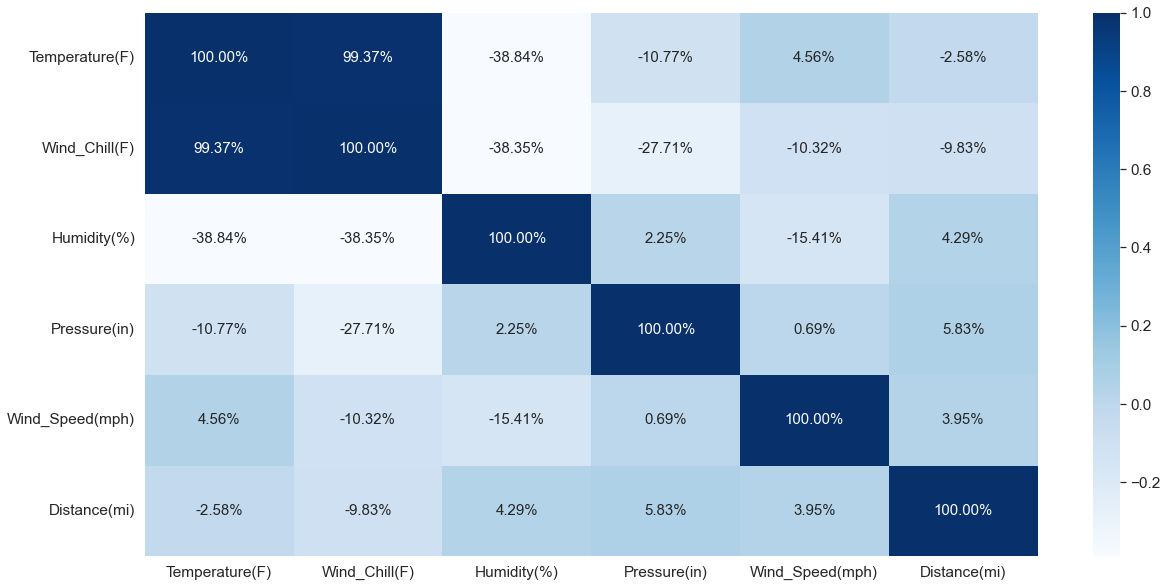

In [64]:
corr_weather_dist = weather_severity[['Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)',
       'Wind_Speed(mph)','Distance(mi)']]
no_out_weather_corr = corr_weather_dist.corr(method= 'pearson')
plt.figure(figsize = (20,10))
plt.xlabel('Weather', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Weather', fontsize = 20)
r = sns.heatmap(no_out_weather_corr, cmap = 'Blues',annot = True, fmt=".2%",annot_kws={"size":15})

Severity
1    AxesSubplot(0.547727,0.391471;0.352273x0.222059)
2    AxesSubplot(0.547727,0.391471;0.352273x0.222059)
3    AxesSubplot(0.547727,0.391471;0.352273x0.222059)
4    AxesSubplot(0.547727,0.391471;0.352273x0.222059)
Name: wind_mph_avg, dtype: object

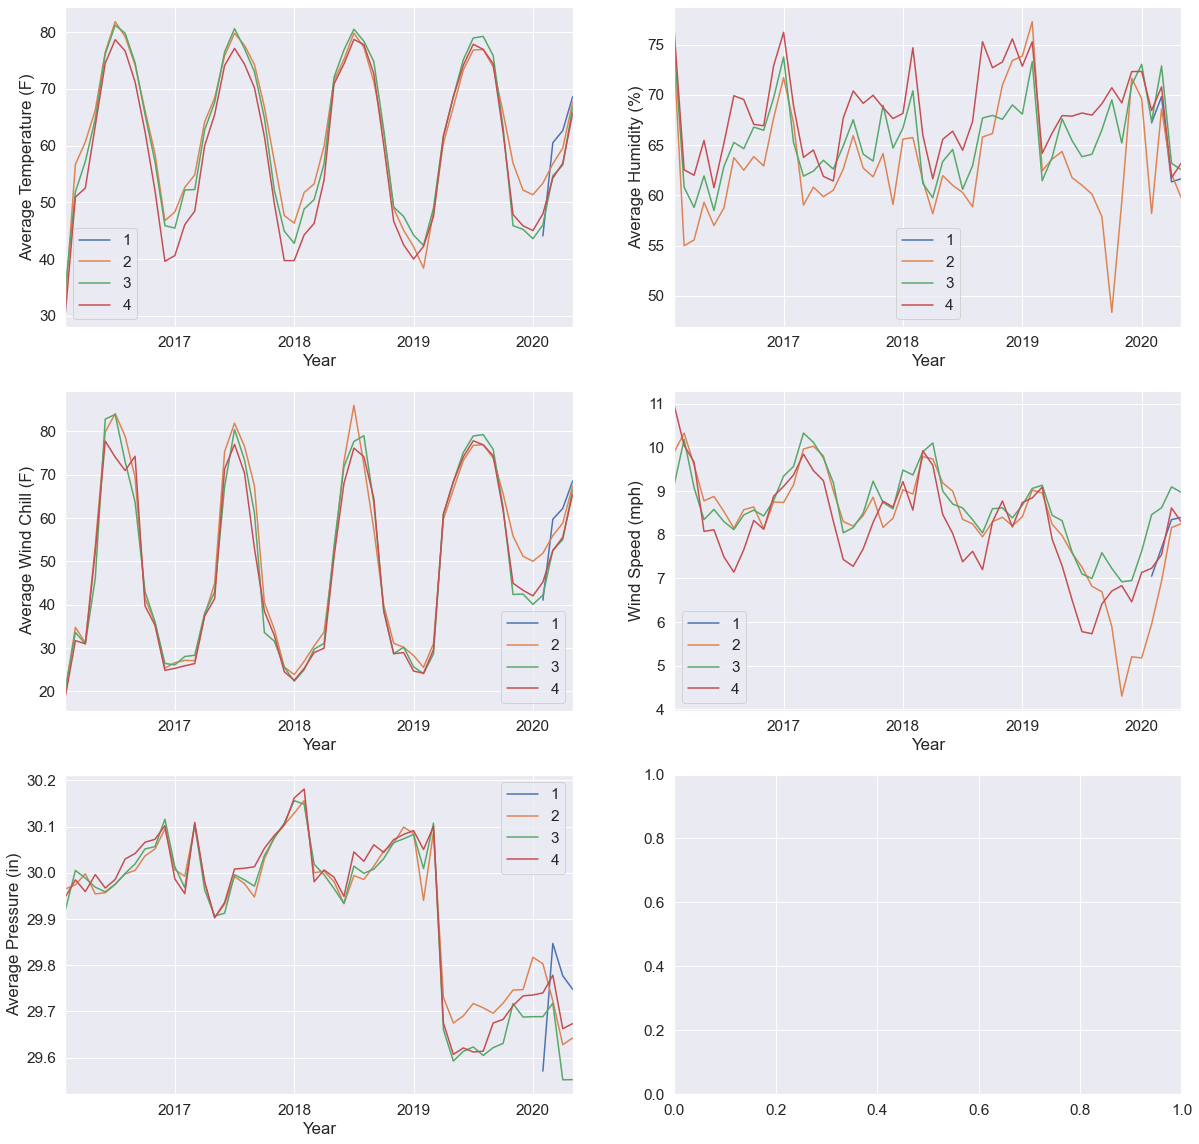

In [65]:
weather_yr = noout_weather.reset_index()
fig, ax = plt.subplots(3,2, sharex =  False, sharey = False, figsize = (20,20))
weather_yr_avg = weather_yr.set_index('Month_year')
weather_yr_avg.groupby('Severity')['temp_avg'].plot(ax = ax[0,0], ylabel = 'Average Temperature (F)', xlabel = 'Year', legend=True)
weather_yr_avg.groupby('Severity')['wind_temp_avg'].plot(ax = ax[1,0], ylabel = 'Average Wind Chill (F)', xlabel = 'Year',legend=True)
weather_yr_avg.groupby('Severity')['humidity_avg'].plot(ax = ax[0,1], ylabel = 'Average Humidity (%)', xlabel = 'Year',legend=True)
weather_yr_avg.groupby('Severity')['pressure_avg'].plot(ax = ax[2,0], ylabel = 'Average Pressure (in)',xlabel = 'Year', legend=True)
weather_yr_avg.groupby('Severity')['wind_mph_avg'].plot(ax = ax[1,1], ylabel = 'Wind Speed (mph)', xlabel = 'Year',legend=True)

Looking at the data, we can see the average climate in respect to Severity over time. 

In [72]:
weather_severity
reg_model = weather_severity.dropna()
independent_variable = reg_model.iloc[:, 1:6]
dependent_variable = reg_model.iloc[:, -1]

independent_variable = sm.add_constant(independent_variable)  

regression_model_std = sm.OLS(dependent_variable,independent_variable).fit() 
regression_model_std.summary()

/Users/nominbatbayar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Distance(mi)   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1745.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:57:36   Log-Likelihood:            -7.6554e+05
No. Observations:              427510   AIC:                         1.531e+06
Df Residuals:                  427504   BIC:                         1.531e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.7730      0.192    -14.433      0.000      -3.150      -2.396
Temperature(F)      0.0719      0.001     52.705      0.000       0.069       0.075
Wind_Chill(F)      -0.0667      0.001    -56.520      0.000      -0.069      -0.064
Humidity(%)         0.0045      0.000     39.436      0.000       0.004       0.005
Pressure(in)        0.0825      0.006     12.995      0.000       0.070       0.095
Wind_Speed(mph)     0.0002      0.001      0.393      0.694      -0.001       0.001
==============================================================================
Omnibus:                  1027357.421   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      38061158880.469
Skew:                          24.397   Prob(JB):                         0.00
Kurtosis:                    1463.937   Cond. No.                     9.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Types of Infrastructure near accidents

/var/folders/9y/bwn856cd0_z4h_gyjb1b6hl80000gn/T/ipykernel_21972/1360047059.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  t.set( xlabel = "Types of Infastructure", ylabel = "Severity of Accident", Title = "Total number of accidents")


[Text(0.5, 17.359375, 'Types of Infastructure'),
 Text(152.5, 0.5, 'Severity of Accident'),
 Text(0.5, 1.0, 'Total number of accidents')]

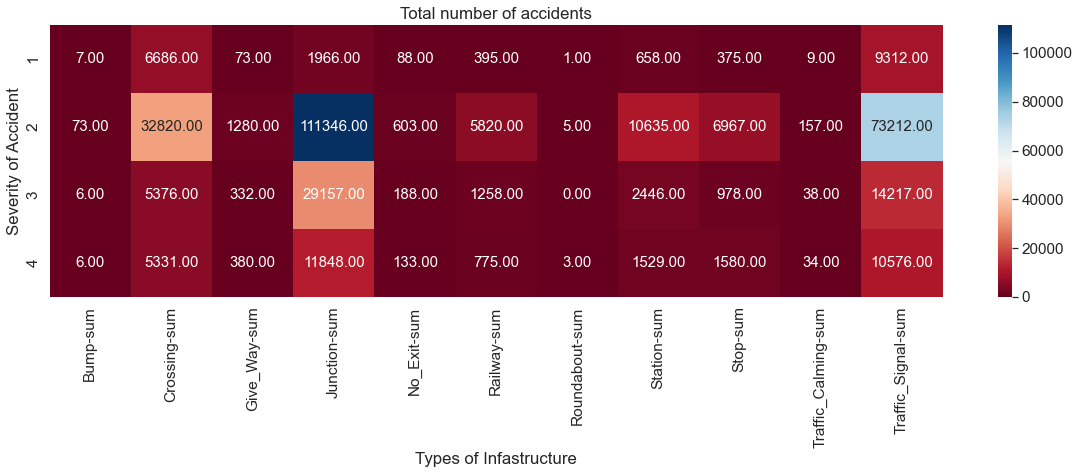

In [66]:
accidents_num_test = filter_year[['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Severity']]
traffic = accidents_num_test*1
traffic_sev_total = traffic.groupby('Severity').agg(['sum'], axis = "columns")
t = sns.heatmap(traffic_sev_total, cmap = 'RdBu', annot = True, fmt=".2f",annot_kws={"size":15})
t.set( xlabel = "Types of Infastructure", ylabel = "Severity of Accident", Title = "Total number of accidents")

<AxesSubplot:>

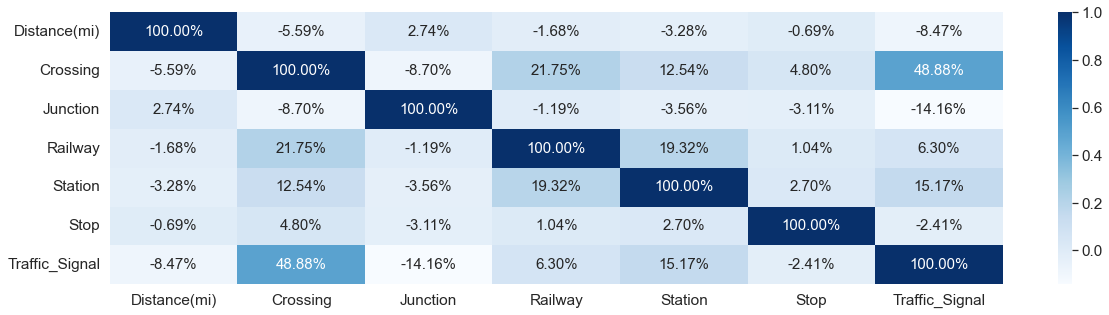

In [67]:
heat_mi = filter_year[['ID','Distance(mi)','Crossing', 'Junction','Railway','Station', 'Stop','Traffic_Signal']]
heat_mi_num = heat_mi*1
heat_mi_index = heat_mi_num.set_index("ID")
heat_mi_cor = heat_mi_index.corr(method= 'pearson')
sns.heatmap(heat_mi_cor, cmap = 'Blues',annot = True, fmt=".2%",annot_kws={"size":15})



### Does Infrastruce delay traffic (in miles)?

# How long do accidents take to resolve?

/var/folders/9y/bwn856cd0_z4h_gyjb1b6hl80000gn/T/ipykernel_21972/2705844025.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_time_dist = time_dist [ ((time_dist < lower_limit) | ((time_dist > upper_limit))).any(axis=1) ]
/var/folders/9y/bwn856cd0_z4h_gyjb1b6hl80000gn/T/ipykernel_21972/2705844025.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers_time_dist = time_dist [~((time_dist < lower_limit) | ((time_dist > upper_limit))).any(axis=1) ]


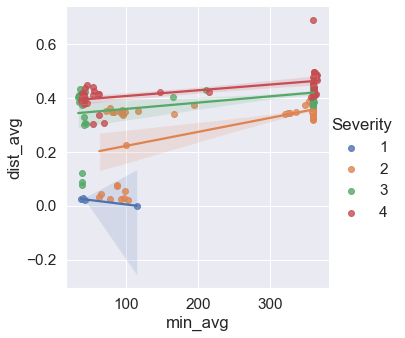

In [68]:
time_dist = filter_year[['diff_minutes','Distance(mi)','ID']]
time_dist_df = time_dist.set_index('ID')
time_merge_df = filter_year[['ID','Severity','Month_year']]

q1 = time_dist.quantile(.25)
q3 = time_dist.quantile(.75)
iqr = q3-q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

outliers_time_dist = time_dist [ ((time_dist < lower_limit) | ((time_dist > upper_limit))).any(axis=1) ]

no_outliers_time_dist = time_dist [~((time_dist < lower_limit) | ((time_dist > upper_limit))).any(axis=1) ]
no_outliers_time_dist

time_dist_sev_df = no_outliers_time_dist.merge(time_merge_df, on = 'ID', how = 'left')
time_mi_avg = time_dist_sev_df.groupby(['Month_year','Severity']).agg(count = ("ID","count"),
                                             dist_avg = ("Distance(mi)","mean"),
                                                min_avg = ("diff_minutes","mean"))
time_mi_df = time_mi_avg.reset_index()
time_mi_df
sns.lmplot(x="min_avg", y="dist_avg", hue = "Severity", data= time_mi_df);

As severity of accident increases, so does the average traffic distance (mi) it impacts and average time (minutes) to resolve